In [1]:
pwd

'C:\\Users\\Aakash Sadaphule\\Desktop\\Untitled Folder'

In [14]:
import json
import pandas as pd
import time
import numpy as np
from pandas import DataFrame
import re

In [3]:
with open ("C:/Users/Aakash Sadaphule/Desktop/Untitled Folder/archive/MMHS150K_GT.json") as f:
    data = json.load(f)

In [4]:
data

{'1114679353714016256': {'img_url': 'http://pbs.twimg.com/tweet_video_thumb/D3gi9MHWAAAgfl7.jpg',
  'labels': [4, 1, 3],
  'tweet_url': 'https://twitter.com/user/status/1114679353714016256',
  'tweet_text': '@FriskDontMiss Nigga https://t.co/cAsaLWEpue',
  'labels_str': ['Religion', 'Racist', 'Homophobe']},
 '1063020048816660480': {'tweet_url': 'https://twitter.com/user/status/1063020048816660480',
  'labels': [5, 5, 5],
  'img_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1063019643709747200/pu/img/wK5HgoX6tFfxWJmi.jpg',
  'tweet_text': 'My horses are retarded https://t.co/HYhqc6d5WN',
  'labels_str': ['OtherHate', 'OtherHate', 'OtherHate']},
 '1108927368075374593': {'img_url': 'http://pbs.twimg.com/media/D2OzhzHUwAADQjd.jpg',
  'labels': [0, 0, 0],
  'tweet_url': 'https://twitter.com/user/status/1108927368075374593',
  'tweet_text': '“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL SHIT NIGGA” https://t.co/UczofqHrLq',
  'labels_str': ['NotHate', 'NotHate', 'NotHate']},
 '11145585346356

In [5]:
data=pd.DataFrame.from_dict(data)
data=data.T
data=data.reset_index()
data.rename(columns={"index":"user_id"},inplace=True)

In [6]:
print('No. of rows: {} and columns are: {}'.format(data.shape[0],data.shape[1]))
data.head()

No. of rows: 149823 and columns are: 6


,user_id,img_url,labels,tweet_url,tweet_text,labels_str
0,1114679353714016256,http://pbs.twimg.com/tweet_video_thumb/D3gi9MH...,"[4, 1, 3]",https://twitter.com/user/status/11146793537140...,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,"[Religion, Racist, Homophobe]"
1,1063020048816660480,http://pbs.twimg.com/ext_tw_video_thumb/106301...,"[5, 5, 5]",https://twitter.com/user/status/10630200488166...,My horses are retarded https://t.co/HYhqc6d5WN,"[OtherHate, OtherHate, OtherHate]"
2,1108927368075374593,http://pbs.twimg.com/media/D2OzhzHUwAADQjd.jpg,"[0, 0, 0]",https://twitter.com/user/status/11089273680753...,“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,"[NotHate, NotHate, NotHate]"
3,1114558534635618305,http://pbs.twimg.com/ext_tw_video_thumb/111401...,"[1, 0, 0]",https://twitter.com/user/status/11145585346356...,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,"[Racist, NotHate, NotHate]"
4,1035252480215592966,http://pbs.twimg.com/media/Dl30pGIU8AAVGxO.jpg,"[1, 0, 1]",https://twitter.com/user/status/10352524802155...,“EVERYbody calling you Nigger now!” https://t....,"[Racist, NotHate, Racist]"


# Word count

In [7]:
data['word_count']=data['tweet_text'].apply(lambda x:len(x))

In [8]:
data.head()

,user_id,img_url,labels,tweet_url,tweet_text,labels_str,word_count
0,1114679353714016256,http://pbs.twimg.com/tweet_video_thumb/D3gi9MH...,"[4, 1, 3]",https://twitter.com/user/status/11146793537140...,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,"[Religion, Racist, Homophobe]",44
1,1063020048816660480,http://pbs.twimg.com/ext_tw_video_thumb/106301...,"[5, 5, 5]",https://twitter.com/user/status/10630200488166...,My horses are retarded https://t.co/HYhqc6d5WN,"[OtherHate, OtherHate, OtherHate]",46
2,1108927368075374593,http://pbs.twimg.com/media/D2OzhzHUwAADQjd.jpg,"[0, 0, 0]",https://twitter.com/user/status/11089273680753...,“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,"[NotHate, NotHate, NotHate]",80
3,1114558534635618305,http://pbs.twimg.com/ext_tw_video_thumb/111401...,"[1, 0, 0]",https://twitter.com/user/status/11145585346356...,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,"[Racist, NotHate, NotHate]",76
4,1035252480215592966,http://pbs.twimg.com/media/Dl30pGIU8AAVGxO.jpg,"[1, 0, 1]",https://twitter.com/user/status/10352524802155...,“EVERYbody calling you Nigger now!” https://t....,"[Racist, NotHate, Racist]",59


# Average of the word counts in tweets and number of tweets.

In [9]:
print(len(data))

149823


In [10]:
Aw=sum(data['word_count'])/len(data)
print(Aw)

84.72645721951903


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149823 entries, 0 to 149822
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     149823 non-null  object
 1   img_url     149823 non-null  object
 2   labels      149823 non-null  object
 3   tweet_url   149823 non-null  object
 4   tweet_text  149823 non-null  object
 5   labels_str  149823 non-null  object
 6   word_count  149823 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 8.0+ MB


array([[<AxesSubplot:title={'center':'word_count'}>]], dtype=object)

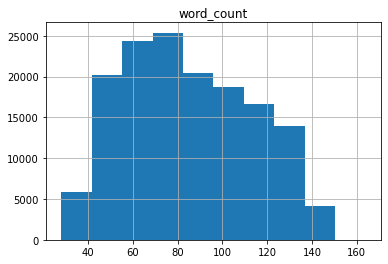

In [13]:
data.hist()

# Number of metions and hashtags

In [62]:
hashtags = []
hashtags_re = re.compile(r"#[a-zA-Z]+")
matches = list(data['tweet_text'].apply(hashtags_re.findall))

dict_H = {}
for i in matches:
    for j in i:
        if j not in dict_H.keys():
            dict_H[j] = 1
        else:
            dict_H[j] = dict_H[j]+1
            
mentions=[]
mentions_re=re.compile(r"@[a-zA-Z]+")
matches1=list(data['tweet_text'].apply(mentions_re.findall))

dict_M={}
for i in matches1:
    for j in i:
        if j not in dict_M.keys():
            dict_M[j] = 1
        else:
            dict_M[j] = dict_M[j]+1

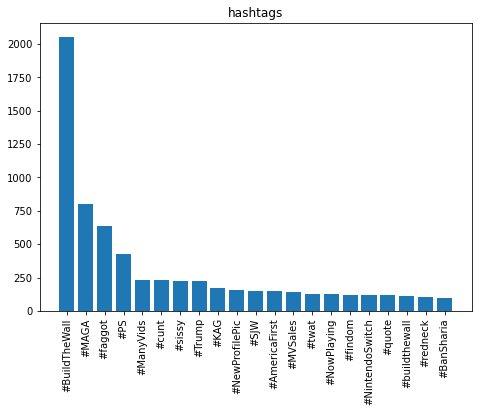

In [69]:
H_key=[]
H_value=[]
list1 =sorted(dict_H.items(), key=lambda x:x[1],reverse=True)
for i in hash_list[:21]:
    H_key.append(i[0])
    H_value.append(i[1])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("hashtags")
ax.bar(H_key,H_value)
plt.xticks(rotation=90)
plt.show()



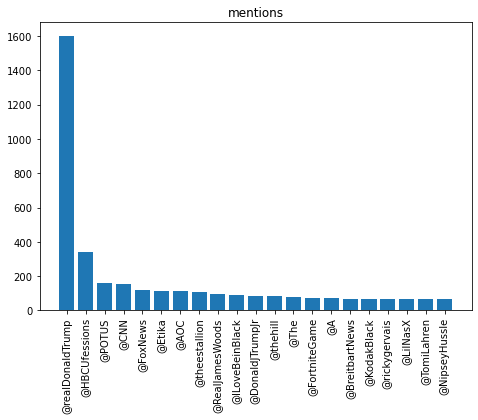

In [70]:
m_key=[]
m_value=[]
list2 =sorted(dict_M.items(), key=lambda x:x[1],reverse=True)
for i in list2[:21]:
    m_key.append(i[0])
    m_value.append(i[1])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("mentions")
ax.bar(m_key,m_value)
plt.xticks(rotation=90)
plt.show()

# Visualization of tweet distributions through bar graph.

In [71]:
import matplotlib.pyplot as plt

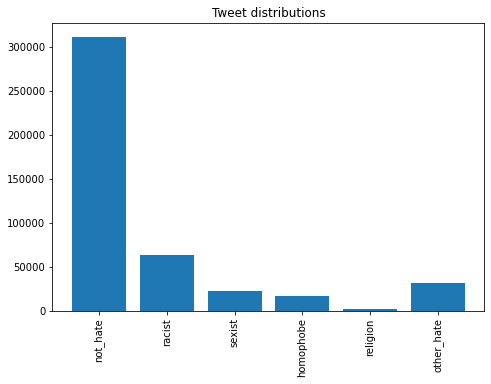

In [72]:
not_hate=0
racist=0
sexist=0
homophobe=0
religion=0
other_hate=0
for i in data['labels']:
    for j in i:
        if j==0:
            not_hate+=1
        elif j==1:
            racist+=1
        elif j==2:
            sexist+=1
        elif j==3:
            homophobe+=1
        elif j==4:
            religion+=1
        else:
            other_hate+=1
labels1=['not_hate','racist','sexist','homophobe','religion','other_hate']
labels1_value=[not_hate,racist,sexist,homophobe,religion,other_hate]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Tweet distributions")
ax.bar(labels1,labels1_value)
plt.xticks(rotation=90)
plt.show()